<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Vol_adjusted_Close.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install yfinance

[*********************100%***********************]  1 of 1 completed


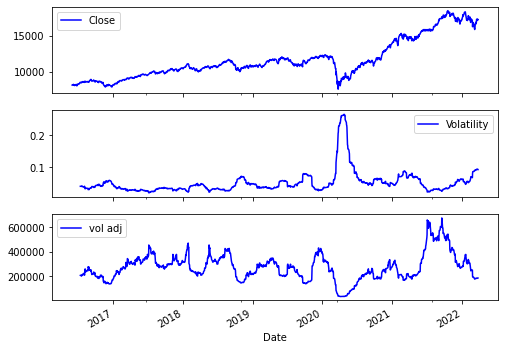

In [25]:
# Load the required modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Pull NIFTY data from Yahoo finance 
NIFTY = yf.download('^nsei',start='2016-6-1')
#NIFTY['Close']=np.where(NIFTY['Close']<30,130,NIFTY['Close'])
# Compute the logarithmic returns using the Closing price 
NIFTY['Log_Ret'] = np.log(NIFTY['Close'] / NIFTY['Close'].shift(1))

# Compute Volatility using the pandas rolling standard deviation function
NIFTY['Volatility'] = NIFTY['Log_Ret'].rolling(window=30).std() * np.sqrt(30)
NIFTY['vol adj']=NIFTY['Close']/NIFTY['Volatility']
NIFTY['mov']=NIFTY['vol adj'].rolling(window=20).mean()
NIFTY['mov10']=NIFTY['Close'].rolling(window=20).mean()

# Plot the NIFTY Price series and the Volatility
NIFTY[['Close', 'Volatility','vol adj']].plot(subplots=True, color='blue',figsize=(8, 6));


In [26]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
NIFTY['vol adj']=sc.fit_transform(NIFTY['vol adj'].values.reshape(-1,1))
NIFTY['mov']=sc.fit_transform(NIFTY['mov'].values.reshape(-1,1))

In [27]:
NIFTY=NIFTY[-1500:].copy()

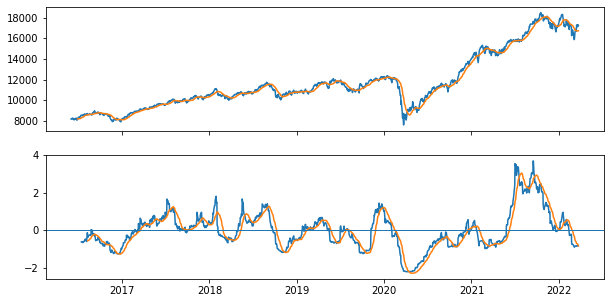

In [28]:
plt.rcParams["figure.figsize"] = (10,5)
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].plot(NIFTY[['Close','mov10']],lw=1.5)
ax[1].plot(NIFTY[['vol adj','mov']],lw=1.5)
ax[1].axhline(y=0,lw=1.0)
plt.show()

In [29]:
NIFTYa=NIFTY[-500:].copy()

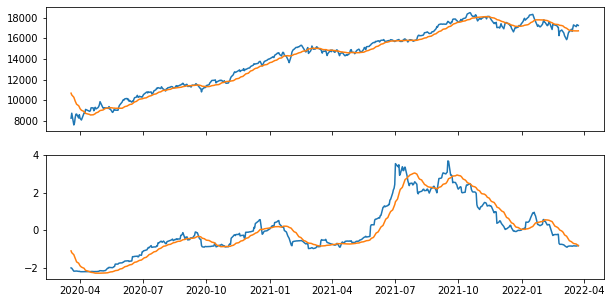

In [30]:
plt.rcParams["figure.figsize"] = (10,5)
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].plot(NIFTYa[['Close','mov10']],lw=1.5)
ax[1].plot(NIFTYa[['vol adj','mov']],lw=1.5)
plt.show()

In [31]:
NIFTY1=NIFTY[-50:].copy()

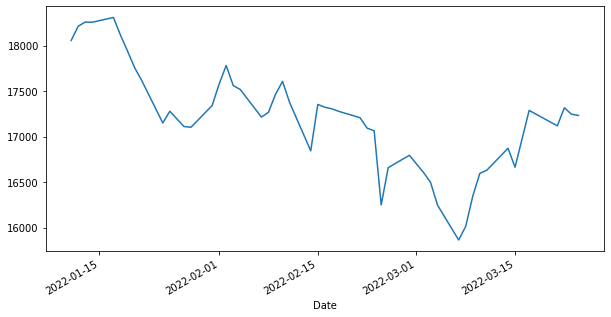

In [32]:
NIFTY1['Close'].plot();

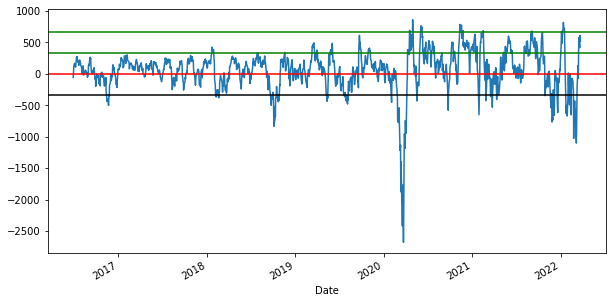

In [41]:
(NIFTY['Close']-NIFTY['mov10']).plot();
plt.axhline(y=0, color='r')
plt.axhline(y=330,color='g')
plt.axhline(y=-330,color='k')
plt.axhline(y=330*2,color='g');

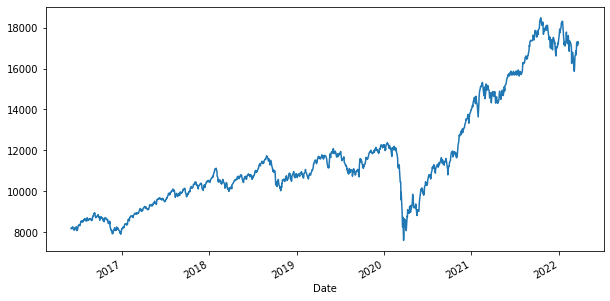

In [36]:
NIFTY['Close'].plot();